# Delayed tasks analysis


### Convert notebook to python
```
bash
jupyter nbconvert "D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20221201_073500_reaching_go_spout_bar_nov22.ipynb" --to="python" --output-dir="D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical" --output="nb20221201_073500_reaching_go_spout_bar_nov22"
```

Quick analysis of instrumental reaching

In [1]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *



        if you want to export datasets to perform Maching Learning tasks.
        To solve, type pip install sktime in your environment


### Variables

In [2]:
import pandas as pd
from pathlib import Path
trial_window = [-4000, 8000] # in ms

# time limit around trigger to perform an event determine successful trials
# timelim = [1000, 4000] # in ms useless here, to deprecate 
# in favor of computing presence of an event during certain states for success in the future

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder = Path(os.getcwd()).parent.parent

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = Path(basefolder,'params','tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

# from sample_data

# # From jade
# photometry_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/photometry')
# pycontrol_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pycontrol')

# # From julien-pc
photometry_dir = Path('\\ettin\Magill_Lab\Julien\Data\head-fixed\photometry\reaching_go_spout_bar_nov22')
pycontrol_dir = Path('\\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol\reaching_go_spout_bar_nov22')

# From laptop
# photometry_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pyphotometry'
# pycontrol_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\reaching_go_spout_incr_break2_nov22'

video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'
tasks = pd.read_csv(tasksfile, usecols=[1, 2, 3, 4], index_col=False)


### Create an experiment object


In [8]:
# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(path=pycontrol_dir, int_subject_IDs=True, update=True, verbose=False)

NotImplementedError: 

### Perform extraction of behavioural information by trial

In [41]:
# Process the whole experimental folder by trials


exp_cohort.process_exp_by_trial(trial_window=trial_window, timelim=None, tasksfile=tasksfile, verbose=True)

# Save the file as sessions.pkl in folder_path
# exp_cohort.save()

processing by trial: kms061-2023-02-06-103133.txt task: reaching_go_spout_incr_break2_nov22
No trial Length of values (351) does not match length of index (330) found: kms061-2023-02-06-103133.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms058-2023-02-06-104132.txt task: reaching_go_spout_incr_break2_nov22
No trial Length of values (369) does not match length of index (365) found: kms058-2023-02-06-104132.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms063-2023-02-06-110950.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms062-2023-02-06-112913.txt task: reaching_go_spout_incr_break2_nov22
No trial Length of values (239) does not match length of index (236) found: kms062-2023-02-06-112913.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms058-2023-02-07-105430.txt task: reaching_go_spout_incr_break2_nov22
processing by trial: kms062-2023-02-07-115221.txt task: reaching_go_spout_incr_break2_nov22
process

### df_conditions dataframe (metadata for single session)

In [42]:
exp_cohort.sessions[0].df_conditions

,trigger,success,valid,spout,US_end_timer,uid
trial_nb,,,,,,
1,busy_win,False,False,True,True,63_2023-02-06_11:09:50_1
2,busy_win,False,True,True,False,63_2023-02-06_11:09:50_2
3,busy_win,False,True,True,True,63_2023-02-06_11:09:50_3
4,busy_win,False,True,True,True,63_2023-02-06_11:09:50_4
5,busy_win,False,True,True,True,63_2023-02-06_11:09:50_5
...,...,...,...,...,...,...
265,busy_win,False,True,False,False,63_2023-02-06_11:09:50_265
266,busy_win,False,True,False,False,63_2023-02-06_11:09:50_266
267,busy_win,False,True,False,False,63_2023-02-06_11:09:50_267


### Defining conditions to categorize trials

In [35]:
# Defime each trial type as a dictionary of conditions to be met
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'hold_for_water', 'success': True, 'valid': True, 
    'hold_timer': True, 'button_press': False, 'water by bar_off': False, 'water for free': False}

conditions_dict2 = {'trigger': 'hold_for_water', 'valid': True, 'hold_timer': False,
    'break_after_abort': True, 'US_end_timer': False, 'success': False, 'button_press': False}

# conditions_dict2 = {'trigger': 'hold_for_water', 'spout':False, 'valid': True, 'busy_win_timer': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict1, conditions_dict2]
# Aliases for conditions
cond_aliases = ['Go - hold', 'Go - aborted']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None

# Window to exctract (in ms)


### Extracting an event_dataset from an Experiment (experimental folder)

In [36]:
ev_dataset = exp_cohort.behav_events_to_dataset(
        groups = None,
        conditions_list = condition_list, 
        cond_aliases = cond_aliases, 
        when =['2022-11-08',...,'2022-12-25'], 
        task_names = ['reaching_go_spout_bar_dual_dec22' ,'reaching_go_spout_bar_dual_all_reward_dec22'], #'pavlovian_nobar_nodelay', #'reaching_go_nogo',
        trig_on_ev = None)

ev_dataset.set_trial_window(trial_window=[-1000,4000], unit='milliseconds')
ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)

### From the whole experiment, only filter a subset of sessions

In [38]:
# reset previous filters
ev_dataset.filter_reset()

# define new filters
bool_filter = (ev_dataset.get_tfkeep_subjects([316,317,318])) & (ev_dataset.get_tfkeep_dates(
    [date(2022,12,16),
    date(2022,12,17),
    date(2022,12,18),
    date(2022,12,19),
    date(2022,12,20)]))
# get_tfkeep_dates will need to take date or time intervals as input

# apply filters to metadata_df
ev_dataset.set_keep(bool_filter)

# you can still apply additional filtering thanks to other methods like:
ev_dataset.filter_lastNsessions(5) # keep only the last 3 sessions for each subject

# We'll need to find a way to plot lines between sessions and/or indicate dates/subjects
# in y axis but that will be a bit tricky to make both flexible and easy to use/implement
ev_dataset.plot_raster(keys=['bar_off_trial_time','spout_trial_time'], module='plotly')


### Metadata dataframe example for an event_dataset
- Here a row is a trial, multiple sessions/animals are combined
- This what looks like metadata_df on an Event_Dataset instance combining multiple trials from multiple sessions and animals


In [13]:
print(ev_dataset.metadata_df.columns)
ev_dataset.metadata_df

Index(['trial_nb', 'trigger', 'success', 'valid', 'US_end_timer',
       'break_after_abort', 'water_on', 'water by bar_off', 'water by spout',
       'water for free', 'water success', 'button_press', 'busy_win_timer',
       'spout', 'hold_timer', 'uid', 'condition_ID', 'condition', 'group_ID',
       'datetime', 'session_nb', 'subject_ID', 'error_trial', 'keep',
       'trial_ID'],
      dtype='object')


,trial_nb,trigger,success,valid,US_end_timer,break_after_abort,water_on,water by bar_off,water by spout,water for free,...,uid,condition_ID,condition,group_ID,datetime,session_nb,subject_ID,error_trial,keep,trial_ID
0,1,hold_for_water,False,True,False,True,False,False,False,False,...,316_2022-12-08_12:55:51_1,1,Go - aborted,0,2022-12-08 12:55:51,1,316,NaN,False,0
1,2,hold_for_water,False,True,False,True,False,False,False,False,...,316_2022-12-08_14:26:30_2,1,Go - aborted,0,2022-12-08 14:26:30,2,316,NaN,False,1
2,4,hold_for_water,False,True,False,True,False,False,False,False,...,316_2022-12-08_14:26:30_4,1,Go - aborted,0,2022-12-08 14:26:30,2,316,NaN,False,2
3,5,hold_for_water,False,True,False,True,False,False,False,False,...,316_2022-12-08_14:26:30_5,1,Go - aborted,0,2022-12-08 14:26:30,2,316,NaN,False,3
4,7,hold_for_water,True,True,False,False,False,False,False,False,...,316_2022-12-08_14:30:46_7,0,Go - hold,0,2022-12-08 14:30:46,3,316,NaN,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,114,hold_for_water,False,True,False,True,False,False,False,False,...,318_2022-12-15_18:50:51_114,1,Go - aborted,0,2022-12-15 18:50:51,13,318,False,False,1279
1280,129,hold_for_water,False,True,False,True,False,False,False,False,...,318_2022-12-15_18:50:51_129,1,Go - aborted,0,2022-12-15 18:50:51,13,318,False,False,1280
1281,132,hold_for_water,False,True,False,True,False,False,False,False,...,318_2022-12-15_18:50:51_132,1,Go - aborted,0,2022-12-15 18:50:51,13,318,False,False,1281
1282,154,hold_for_water,False,True,False,True,False,False,False,False,...,318_2022-12-15_18:50:51_154,1,Go - aborted,0,2022-12-15 18:50:51,13,318,False,False,1282


Note that I recently implemented uid column, common to data and metadata dataframes to make a "unique trial identifier", useful for merging with no ambiguity a data and metadata DataFrame for instance


In [18]:
ev_dataset.metadata_df.uid.tail(5)

1279    318_2022-12-15_18:50:51_114
1280    318_2022-12-15_18:50:51_129
1281    318_2022-12-15_18:50:51_132
1282    318_2022-12-15_18:50:51_154
1283    318_2022-12-15_18:50:51_188
Name: uid, dtype: object

In [20]:
ev_dataset.metadata_df.to_csv(r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\outputs\Event_dataset_metadata_df.csv')

### Data DataFrame for Event_Dataset
- Again this will be better as xarray later
- From interacting with other frameworks with similar issues, I came to know that if we were to keep for a while pandas, the most efficient thing to do would be to store pd.Series within each cell (instead of list or even np.array as indexing would make any apply function or other operation much faster)
- Note that, beside the meaningless index (but fast as 0 based monotonically increasing), the only shared column is now uid

In [15]:
print(ev_dataset.data.columns)
ev_dataset.data

Index(['timestamp', 'uid', 'bar_trial_time', 'bar_off_trial_time',
       'spout_trial_time', 'US_end_timer_trial_time'],
      dtype='object')


,timestamp,uid,bar_trial_time,bar_off_trial_time,spout_trial_time,US_end_timer_trial_time
0,15991,316_2022-12-08_12:55:51_1,"[-2374, -2326, -2230, -2176, 474, 757, 830, 1805]","[-2393, -2351, -2305, -2198, 459, 742, 769, 1730]",[],[]
1,58726,316_2022-12-08_14:26:30_2,[],[],[],[]
2,87850,316_2022-12-08_14:26:30_4,"[1825, 1885, 1905, 1922, 1975, 2013, 2049, 247...","[1810, 1840, 1900, 1920, 1937, 1990, 2028, 221...",[],[]
3,125710,316_2022-12-08_14:26:30_5,"[-1518, 709, 749, 892, 1040, 1055, 1070, 1149,...","[638, 734, 750, 1025, 1040, 1070, 1085, 1164, ...",[],[]
4,140587,316_2022-12-08_14:30:46_7,"[3053, 3071, 3179, 3190, 3197, 3265, 3323, 359...","[3042, 3058, 3076, 3184, 3192, 3259, 3288, 358...","[3542, 4043, 4720, 6824, 8146, 8338, 8358, 837...","[3572, 4073]"
...,...,...,...,...,...,...
1279,2056765,318_2022-12-15_18:50:51_114,"[1240, 1385, 1405, 1416, 1515, 1529, 1571, 179...","[1235, 1380, 1389, 1410, 1421, 1520, 1565, 179...","[1805, 2486, 2493, 2879, 2896, 3042, 3690, 396...","[1766, 3017]"
1280,2309237,318_2022-12-15_18:50:51_129,"[2495, 2502, 2515, 2528, 2546, 2555, 2560, 257...","[2363, 2500, 2510, 2523, 2540, 2547, 2560, 256...",[],[]
1281,2377639,318_2022-12-15_18:50:51_132,[],[],[],[]
1282,2803389,318_2022-12-15_18:50:51_154,"[3390, 3401]","[3371, 3396]",[],[]


In [21]:
ev_dataset.data.to_csv(r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\outputs\Event_dataset_data.csv')

### Behaviour: Compute distribution and optionally turn to a Continuous_Dataset
- You will note here that the structure of the data and metadata changes (maybe a bit of more consistency could be added, but the biggest difference is continous data is stored as np.ndarray with dim = trials x variables x times)


In [22]:
dist_as_continuous = ev_dataset.compute_distribution(
        trial_window = [-1999, 10000],
        bin_size = 100, # do not work as expected with cued-uncued
        normalize = True,
        per_session = True,
        out_as_continuous = True)
dist_as_continuous.set_conditions(conditions=condition_list, aliases=cond_aliases)
# Remove test files
# dist_as_continuous.filterout_subjects([0])

### Particularity of turning an event_dataset to a continous_dataset
- The above function also will yield a different output than a typical photometry session
- because we use per_session = True, which "collapse" the result of all the trials of a session into a single line for the session.
- So here we'll have one line per sessions whereas typical photometry analysis will have one line per trial
- I'll share with you how it looks normally on photometry datasets
- Actually doing that I realize that in the particular case of turning an event dataset into a continuous, outputs are kind of inconsistent (but logical). metadata_df actually contains the discrete timestamps and data is the np.ndarray containing the distribution in frequency as a continuously homegeneously sampled array defined by the binning
- This will need fixing and integration of session/trials metadata such as uid or datetime for instance

In [30]:
print(f'dist_as_continuous.metadata_df columns: \n\n{dist_as_continuous.metadata_df.columns.values}')
print(f'\n\ndist_as_continuous.data type: {type(dist_as_continuous.data)}, shape: {dist_as_continuous.data.shape}')
dist_as_continuous.metadata_df.head()
# Remark on the data shape:
# In this particular case  trials x variables x times for the shape of the data
# turns in to  sessions x event_types(var) x timebin

dist_as_continuous.metadata_df columns: 

['condition_ID' 'group_ID' 'subject_ID' 'session_nb' 'bar_trial_time'
 'bar_off_trial_time' 'spout_trial_time' 'US_end_timer_trial_time'
 'trial_ID' 'datetime' 'bar_dist' 'bar_off_dist' 'spout_dist'
 'US_end_timer_dist' 'keep']


dist_as_continuous.data type: <class 'numpy.ndarray'>, shape: (11, 4, 119)


,condition_ID,group_ID,subject_ID,session_nb,bar_trial_time,bar_off_trial_time,spout_trial_time,US_end_timer_trial_time,trial_ID,datetime,bar_dist,bar_off_dist,spout_dist,US_end_timer_dist,keep
0,0,0,316,13,"[15377, 15434, 9361, 9949, 9983, -2001, 4334, ...","[13808, 15390, 1794, 9701, 9960, 4255, 4351, 8...","[13447, 13501, 14043, 14540, 14655, 14785, 150...","[13462, 2030, 2325, 2477, 5080, 3086, 3415, 57...",0,2022-12-17 11:10:37,"[0.7692307692307693, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.5384615384615385, 0.0, 0.7692307692307693, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
1,0,0,316,14,"[1953, 2044, 2754, 2976, 3116, 3324, 5585, 563...","[1930, 2027, 2724, 2947, 3100, 3301, 3865, 561...","[3978, 4072, 4099, 4130, 4143, 4160, 4179, 423...","[4509, 17954, 2487, 2408, 1843, 1920, 3226, 23...",1,2022-12-19 09:42:41,"[4.545454545454546, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
2,0,0,316,15,"[-2044, -2006, -1995, 4206, 4219, 4866, 4938, ...","[-2039, -2000, 3747, 4212, 4682, 4875, 4946, 1...","[3987, 4558, 5014, 5391, 5990, 6269, 7545, 781...","[4517, 2812, 3900, 1989, 2017, 2886, 2838, 410...",2,2022-12-19 11:15:41,"[1.6666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
3,0,0,317,13,"[-3272, -3106, -3067, -2926, -2884, -2853, -28...","[-3298, -3129, -3101, -3047, -2921, -2858, -28...","[-3411, -2309, -1417, 2401, 2498, 2972, 3067, ...","[-3452, -2350, -1458, 2931]",3,2022-12-16 17:42:18,"[10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0,...",True
4,0,0,317,14,"[1405, 1422, 1742, 1794, 1802, 1974, 2592, 999...","[1379, 1412, 1700, 1747, 1799, 1834, 1979, 259...","[2029, 2046, 2600, 2673, 2700, 2718, 2823, 266...","[2559, 3199, 2252, 2956, 3004, 3763, 3117, 312...",4,2022-12-16 17:44:17,"[1.8181818181818181, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True


I did not exported you the metadata as a csv for this one as i think it is confusing since it looks like event metadata.


### Using the continously sampled distribution to plot below
- heatmap has been recently implemented and lack a tons of details and options
- make one figure by animal, aggreagating all the sessions
- columns are the different trial "conditions" or type
- subplot lines are different events distribution

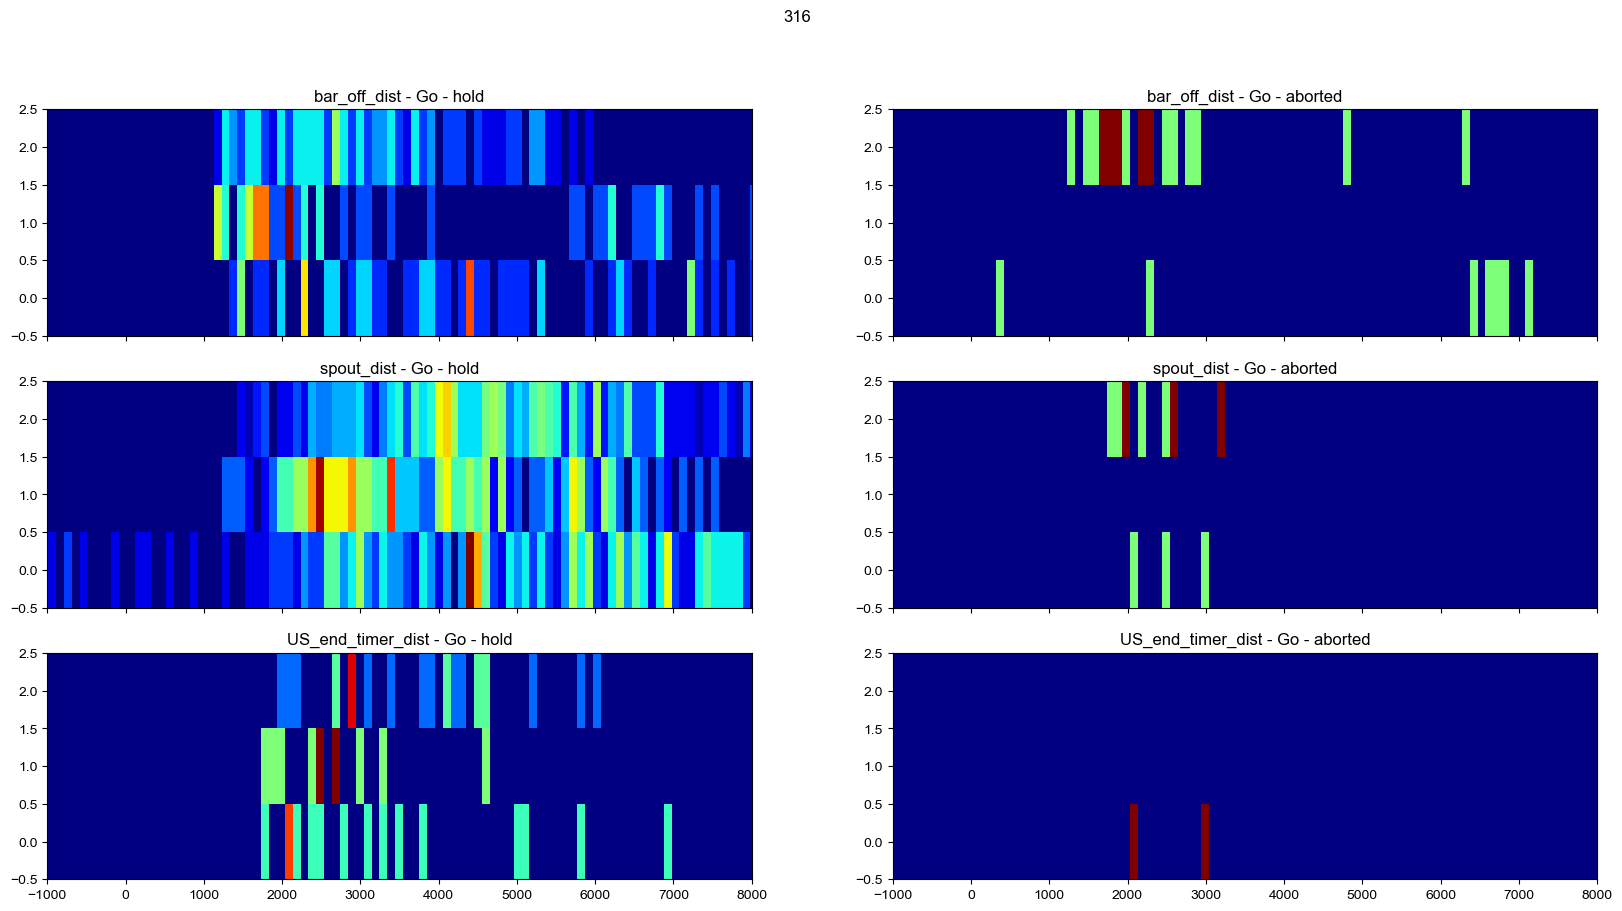

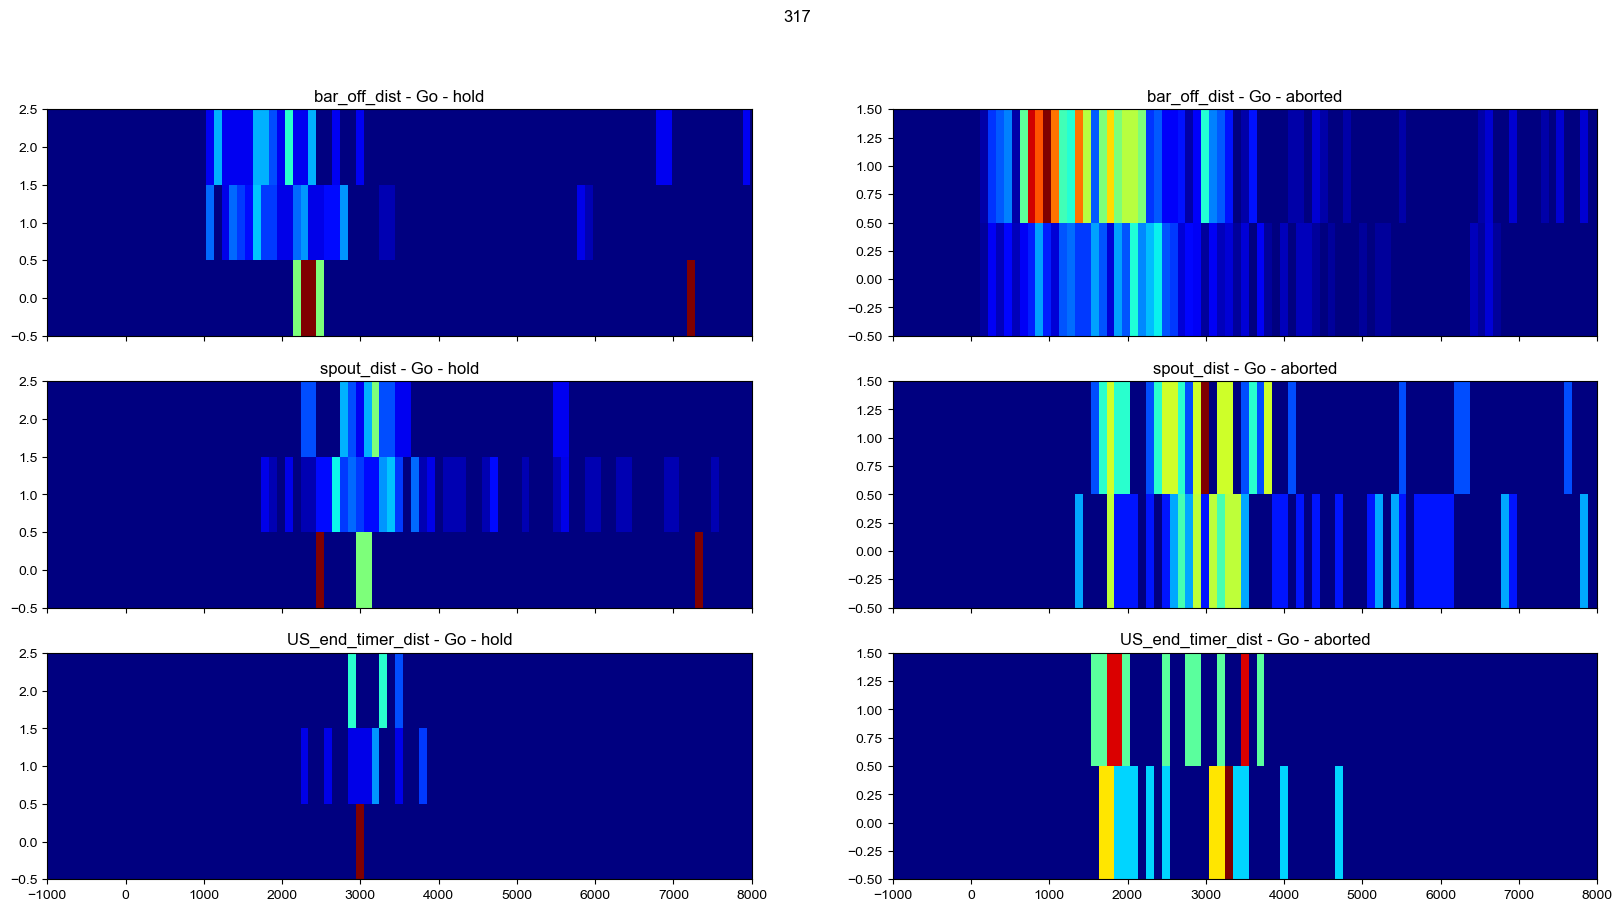

In [31]:
dist_as_continuous.heatmap(
    vars = ['bar_off_dist', 'spout_dist', 'US_end_timer_dist'],
    time_lim = [-1000, 8000],
    colormap = 'jet'
)

### Optional methods

- Implementation of these optional filtering options is first understood as removing subjects, groups, conditions...
- It is a non-permanent way of discarding elements for analysis
- It is based on a "keep" column in the metadata that is True by default and set to False with the filtering function.
- At anytime, <trial_dataset>.filter_reset() can be called to re-include all the elements in the analysis (set all "keep" to True)
- Comment or uncomment lines and fill the lists according to your needs

In [10]:
# Get a list of the groups
dist_as_continuous.get_groups()
# Get a list of the variables
dist_as_continuous.get_col_names()

# reset previous filtering of the dataset
dist_as_continuous.filter_reset()

# exclude some conditions by IDs
# dist_as_continuous.filter_out_conditions([])

# # exclude some groups by IDs
# dist_as_continuous.filter_out_groups([])

# exclude some subjects
dist_as_continuous.filterout_subjects([313,314,315])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])
dist_as_continuous.filter_lastNsessions(3)
# dist_as_continuous.filterout_dates([])

# filter subjects/sessions with less than x trials (by condition)
# dist_as_continuous.filter_min(min_trials = 1)

# To remove subjects who do not have trials
# in all the conditions, if called after filter_min(),
# will discard any subject who do not have the minimum number
# of trials in all the conditions

# dist_as_continuous.filter_if_not_in_all_cond()


Behaviour: Plot distribution

False    42
True     26
Name: keep, dtype: int64

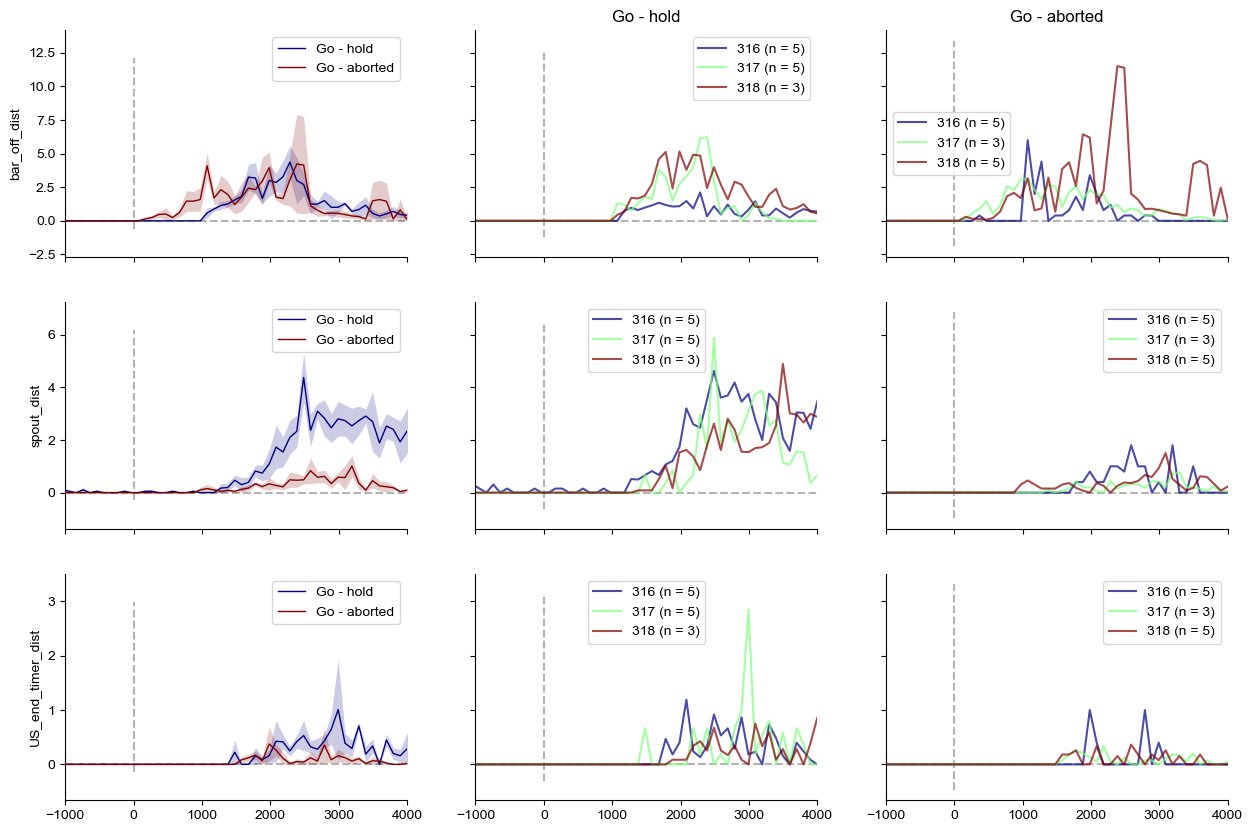

In [11]:
dist_as_continuous.filter_reset()
dist_as_continuous.filter_lastNsessions(n = 5)
dist_as_continuous.lineplot(
    vars = [ 'bar_off_dist','spout_dist','US_end_timer_dist'],
    time_lim = [-1000,4000],
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (15,10),
    dpi = 100,
    verbose = False)
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()


## Match and synchronize photometry to behaviour

In [12]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)
exp_cohort.save()


c:\users\phar0732\documents\github\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
c:\users\phar0732\documents\github\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)


saved C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\sessions.pkl


In [13]:
# exp_cohort.match_sessions_to_files(video_dir, ext='mp4')
# exp_cohort.match_sessions_to_files(video_dir, ext='h5')

In [14]:
exp_cohort.save('20230131_sample_delayed_sessions')

saved C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\20230131_sample_delayed_sessions.pkl


Loop to plot photometry trials triggered on different events
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [15]:

trigs = [None, 'bar_off', 'bar_off', 'spout', 'US_end_timer']
last_befores = [None, None, 'spout', None, None]

photo_dataset = dict()
for idx, trig in enumerate(trigs):
    photo_dataset[idx] = exp_cohort.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = condition_list, 
            cond_aliases = cond_aliases,
            trial_window = trial_window,
            when = 'all', 
            task_names = ['reaching_go_spout_nov22','reaching_go_spout_bar_nov22', 'reaching_go_spout_bar_dual_dec22' ,'reaching_go_spout_bar_dual_all_reward_dec22'],
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            last_before = last_befores[idx],
            high_pass = None, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1','analog_1_filt','analog_2','analog_2_filt','analog_1_df_over_f'], 
            # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True



No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 318 at: 2022-12-08 14:29:10
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 316 at: 2022-12-08 12:55:51
No trial in any condition for subject 316 at: 2022-12-08 14:26:30
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 316 at: 2022-12-08 12:55:51
No trial in any condition for subject 316 at: 2022-12-08 14:26:30
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 316 at: 2022-12-08 12:55:51
No trial in any condition for subject 316 at: 2022-12-08 14:26:30
No trial i

Plot photometry trials triggered on different events based on above extraction
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [53]:

bad_days = photo_dataset[0].metadata_df[photo_dataset[0].metadata_df.subject_ID == 316].datetime.unique()[-3:]
bad_days = [pd.to_datetime(bad_day) for bad_day in bad_days]
photo_dataset[0].metadata_df[photo_dataset[0].metadata_df.subject_ID == 316].datetime.unique()

array(['2022-12-08T12:55:51.000000000', '2022-12-08T14:26:30.000000000',
       '2022-12-08T14:30:46.000000000', '2022-12-09T17:19:25.000000000',
       '2022-12-11T20:26:00.000000000', '2022-12-17T11:10:37.000000000',
       '2022-12-19T09:42:41.000000000', '2022-12-19T11:15:41.000000000'],
      dtype='datetime64[ns]')

cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316


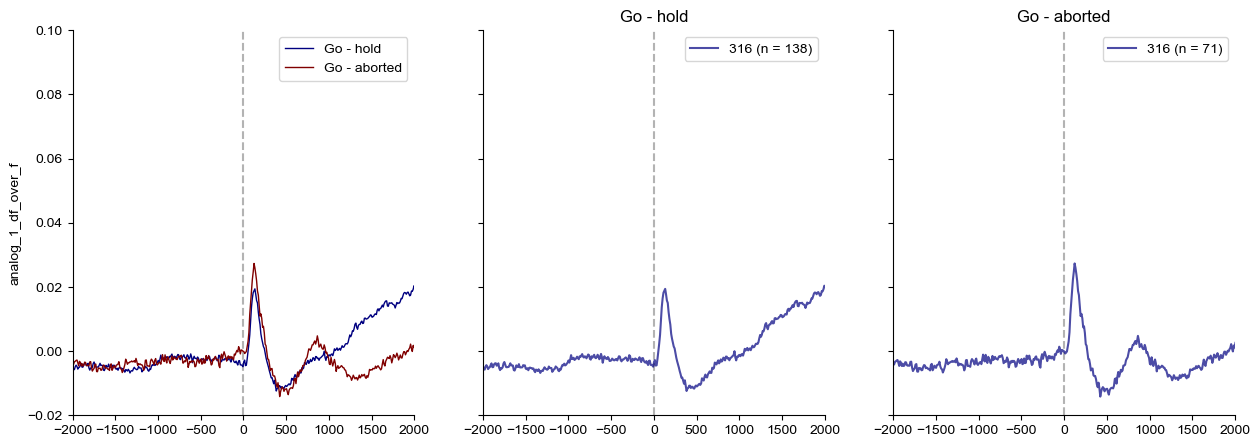

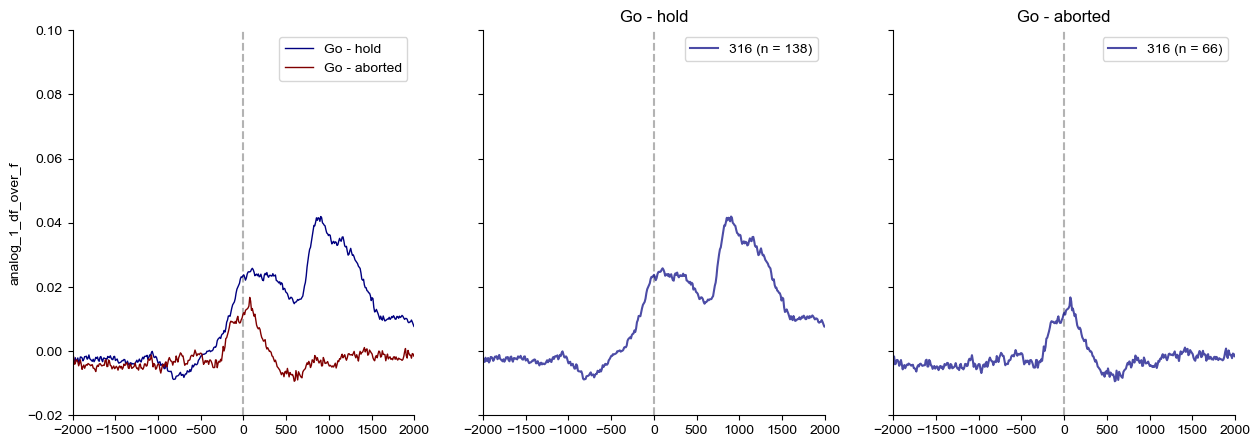

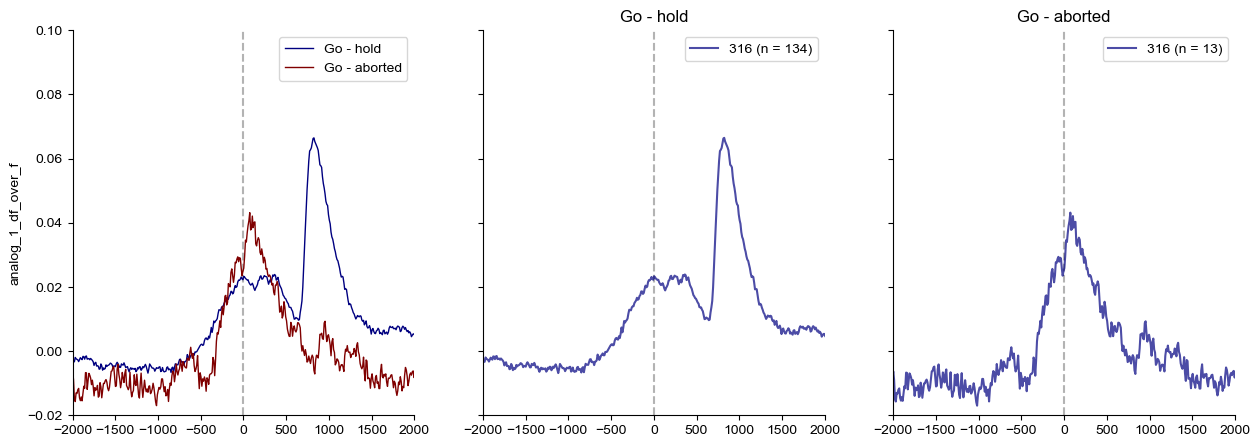

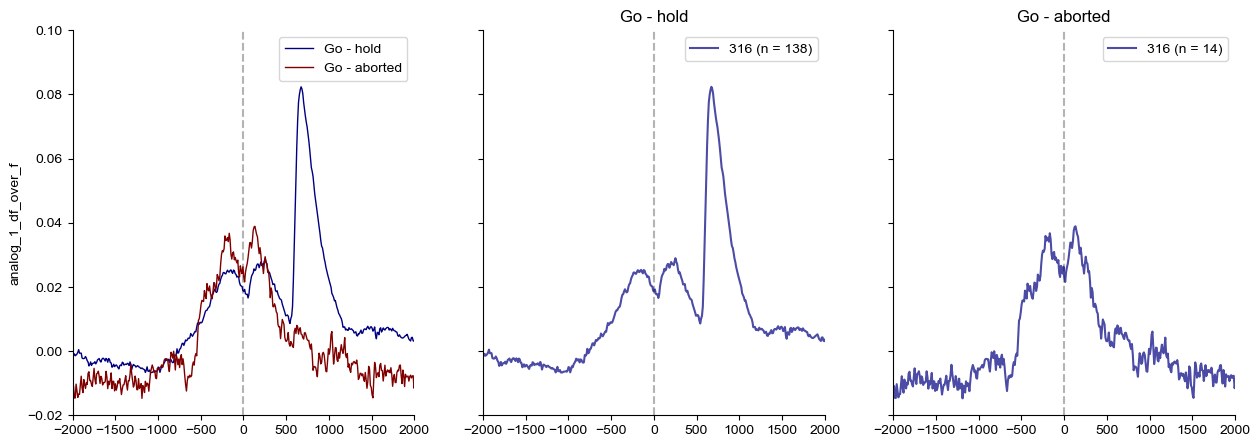

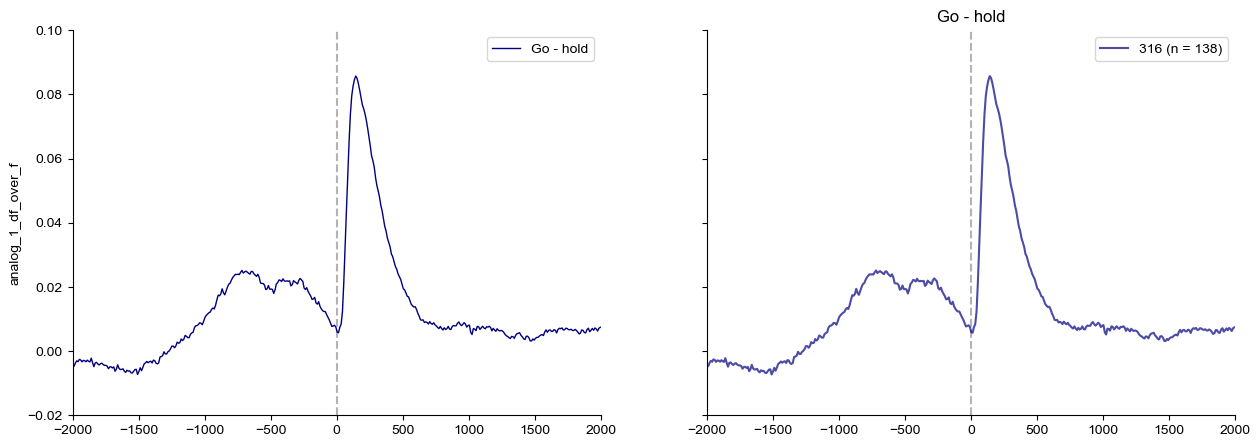

In [51]:

for idx, trig in enumerate(trigs):

    # keep only 316
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([0,1,313,314,317,318])
    photo_dataset[idx].filterout_dates(bad_days)
    photo_dataset[idx].filter_lastNsessions(n = 5)
    if idx == 4:
        photo_dataset[idx].filterout_conditions(1)
    photo_dataset[idx].lineplot(
        vars = ['analog_1_df_over_f'],
        time_lim = [-2000, 2000],
        # time_unit = 'seconds',
        ylim = [[-0.02, 0.10]],# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        liney0 = False,
        linex0 = True,
        figsize = (15, 5),
        dpi = 100,
        verbose = True)

Same plot, heatmap version:

- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

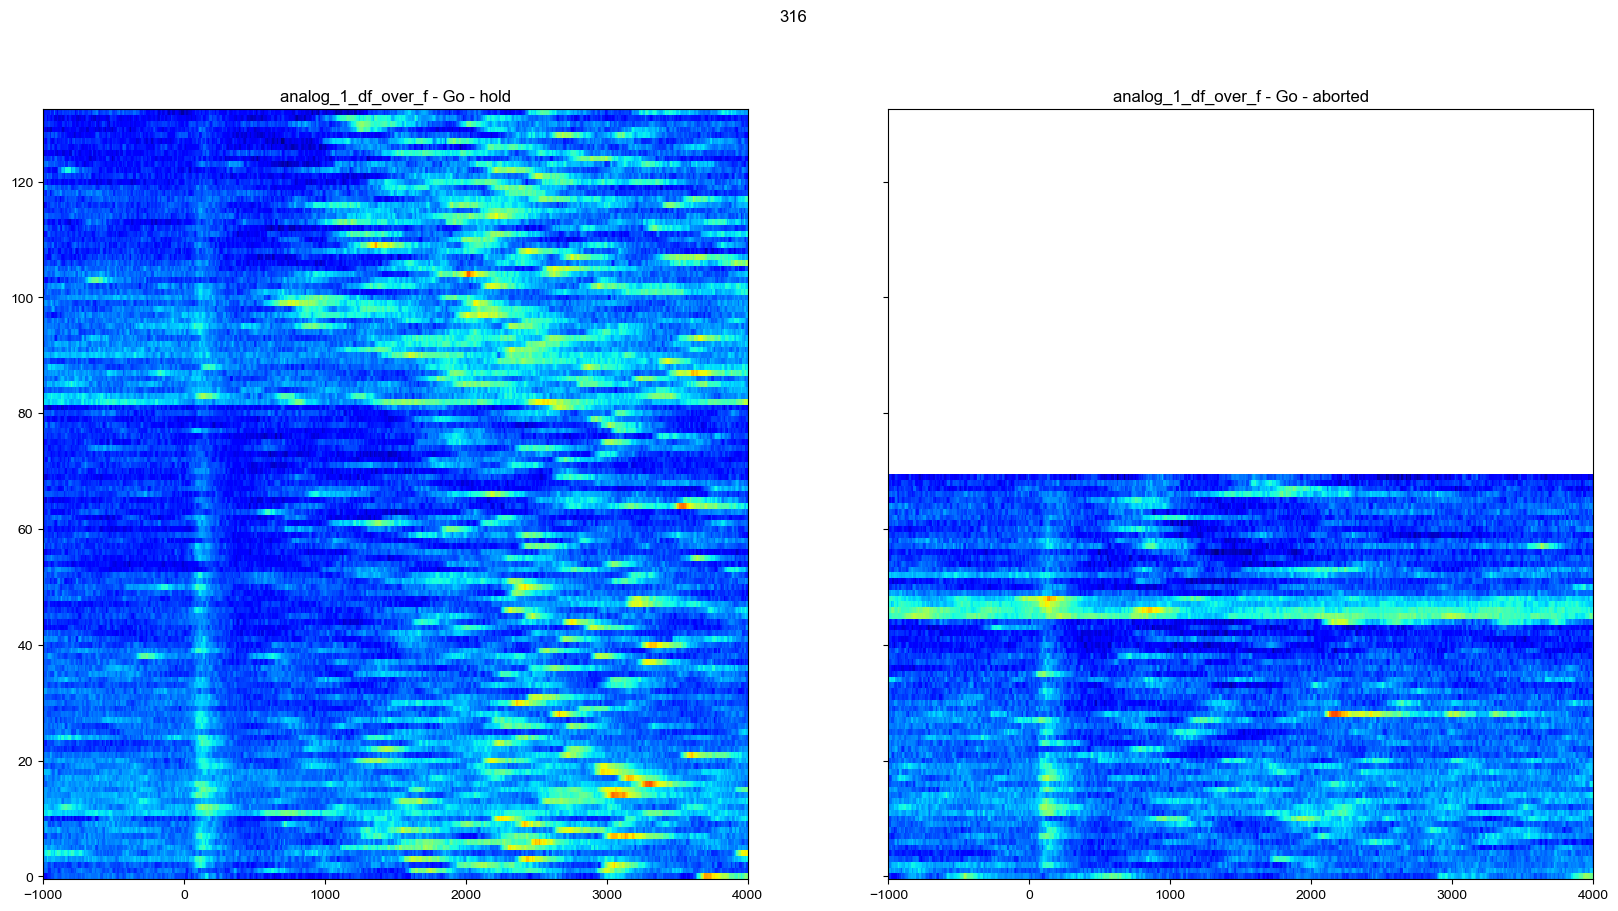

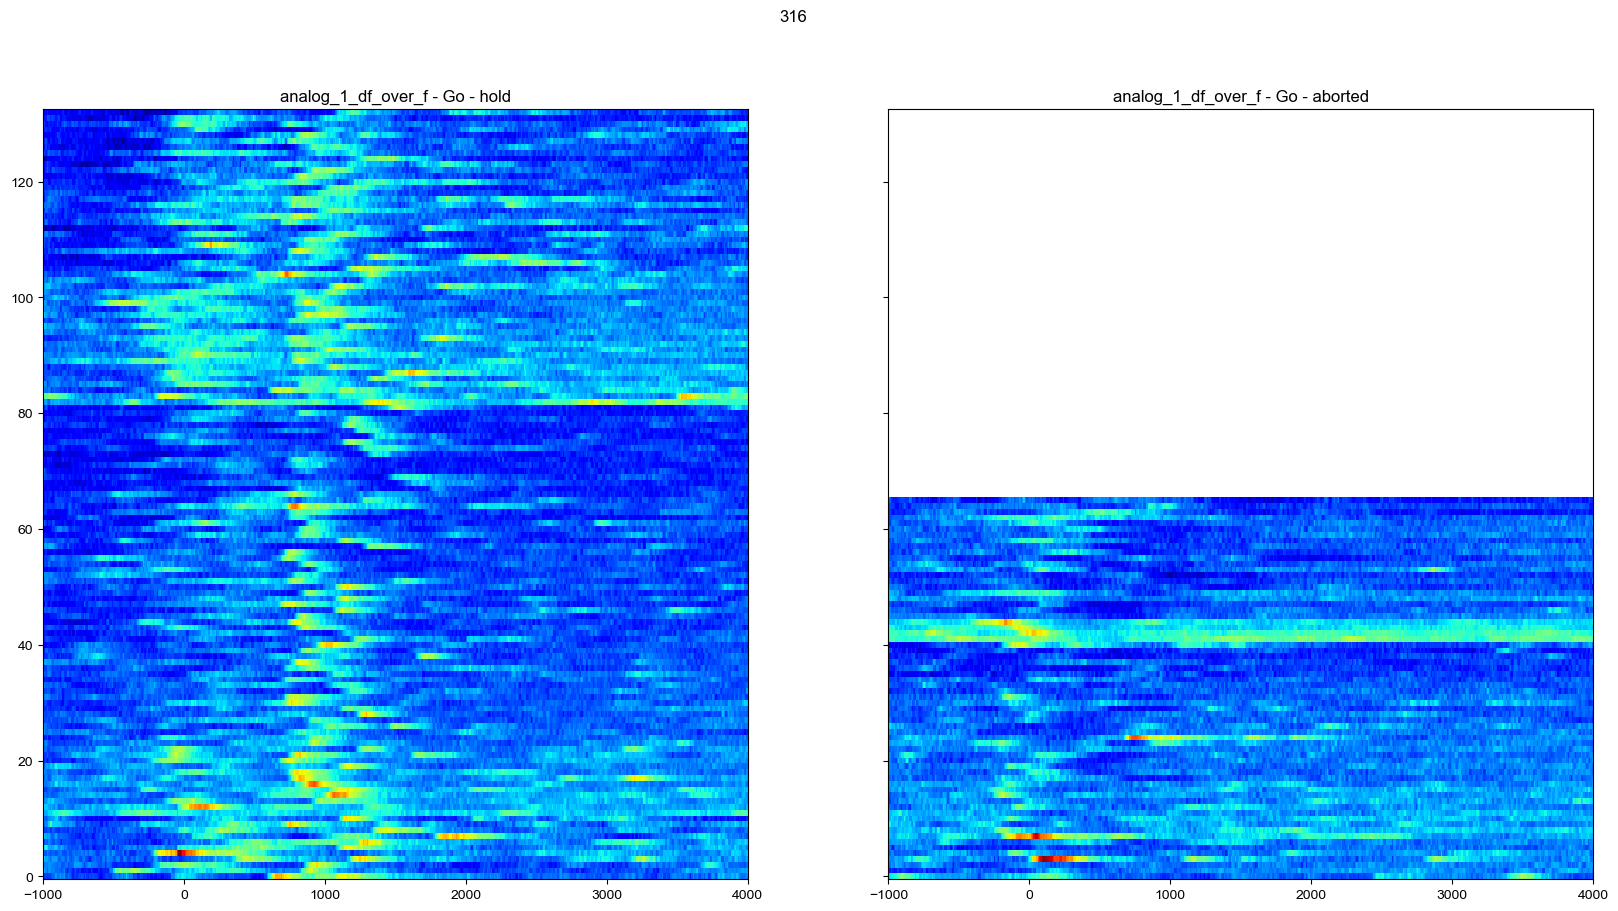

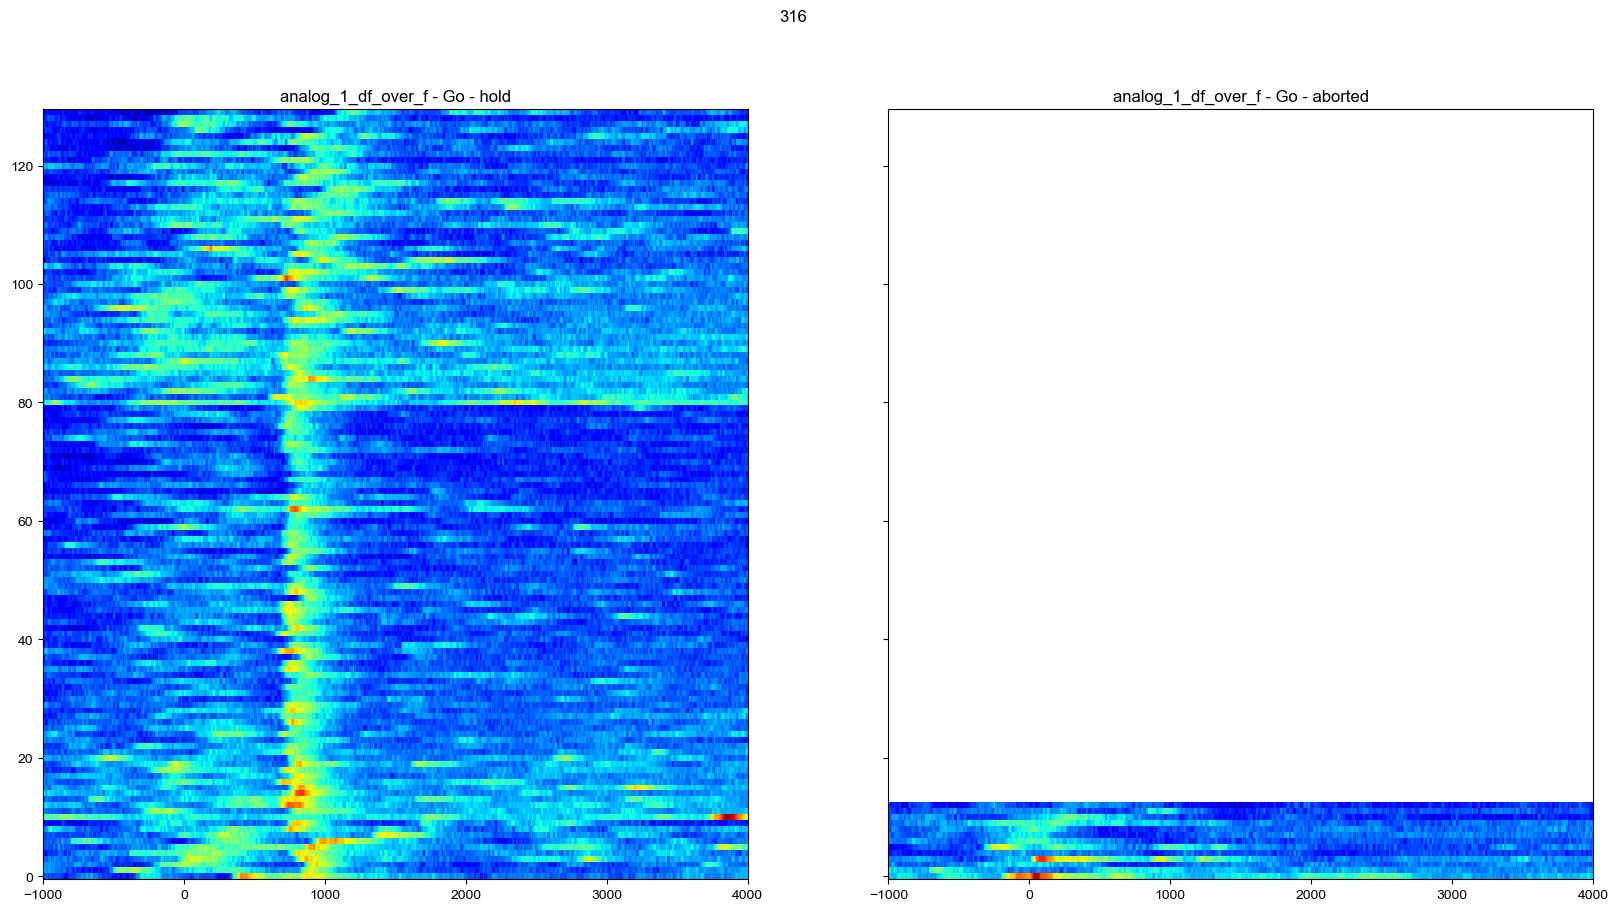

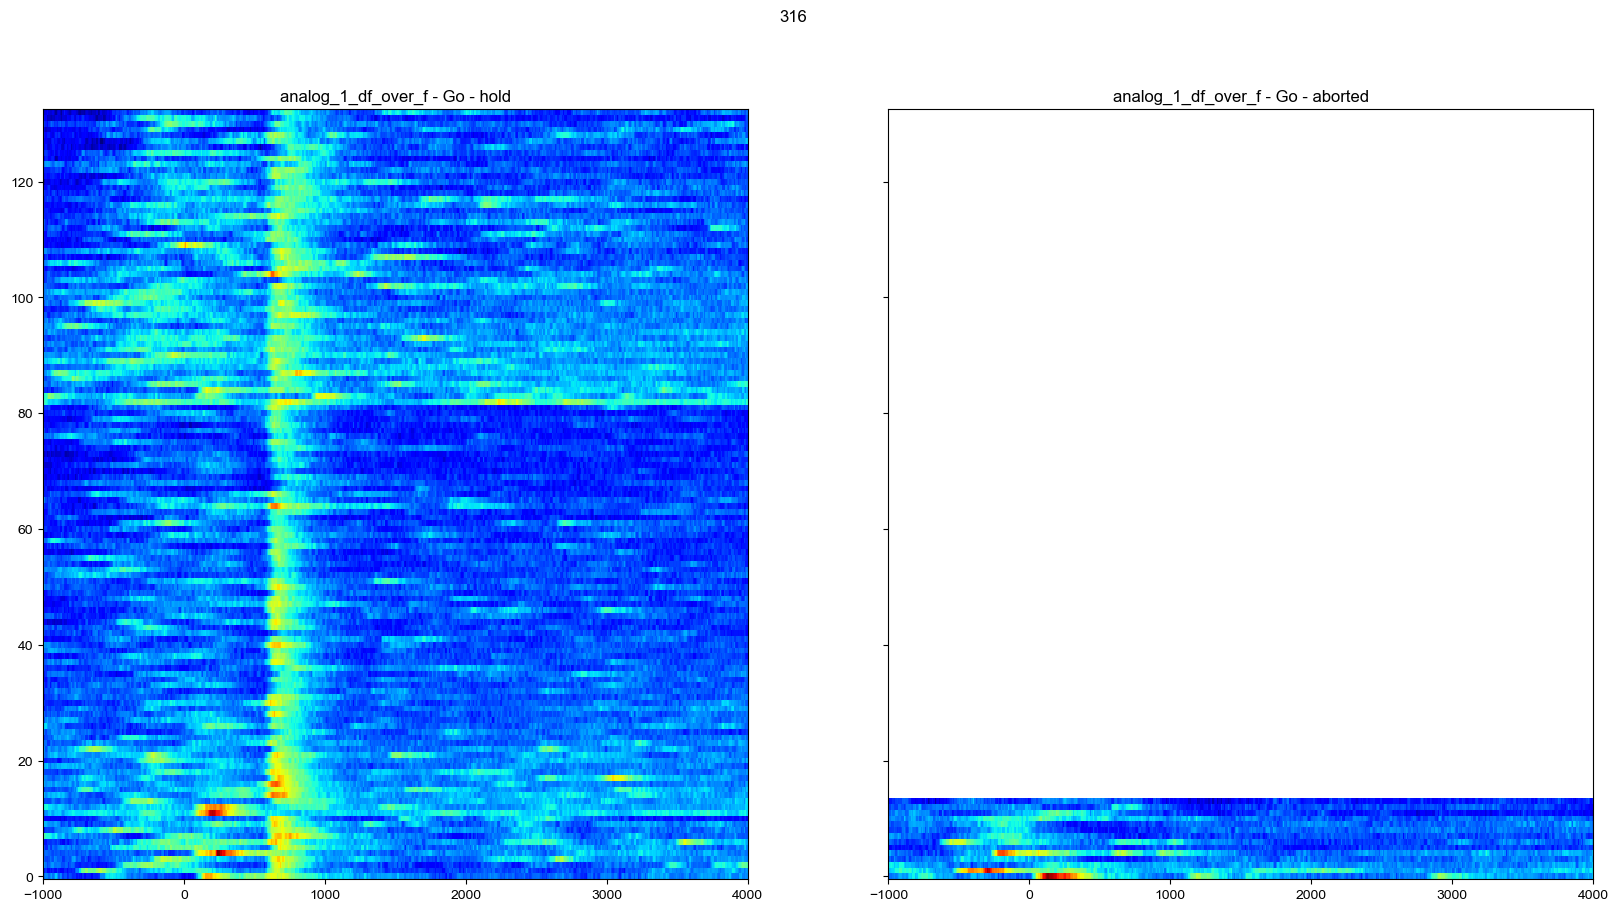

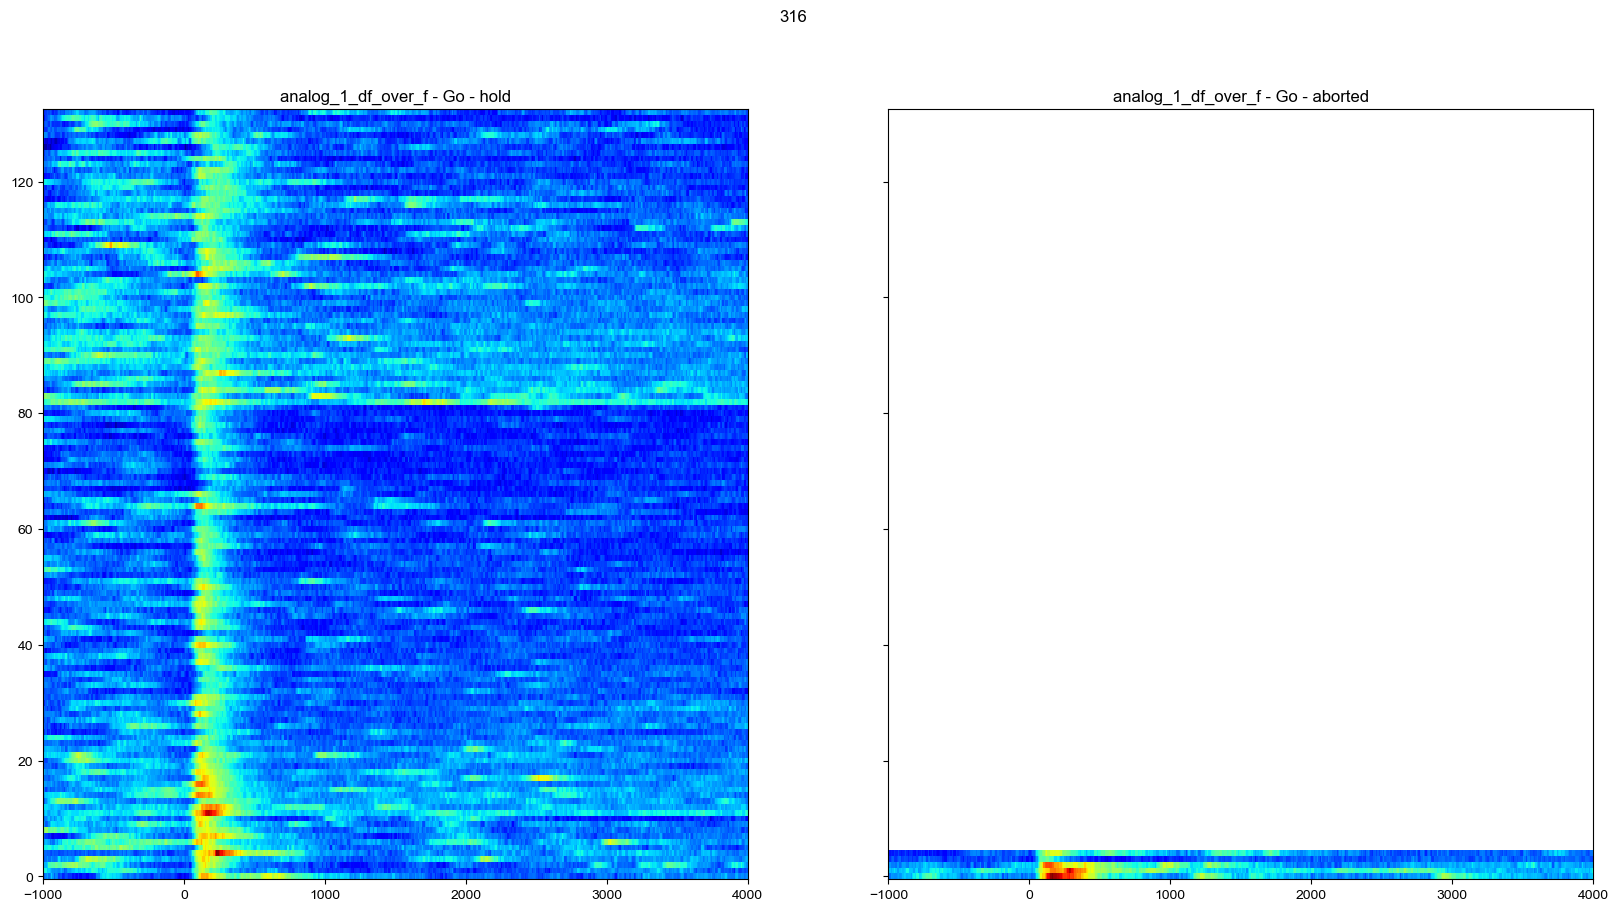

In [54]:
for idx, trig in enumerate(trigs):
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([0,1,313,314,317,318])
    photo_dataset[idx].filterout_dates(bad_days)
    photo_dataset[idx].filter_lastNsessions(n = 10)
    photo_dataset[idx].heatmap(
        vars = ['analog_1_df_over_f'],
        time_lim = [-1000, 4000],
        clim_pctile = None,
        colormap = 'jet'
    )   
    photo_dataset[idx].filter_reset()

In [55]:
bad_days[-1]


Timestamp('2022-12-19 11:15:41')

In [60]:
rec_day_meta = photo_dataset[0].metadata_df[(photo_dataset[0].metadata_df.subject_ID == 316)
    & (photo_dataset[0].metadata_df.datetime == bad_days[-1])]
rec_day_meta

,subject_ID,datetime,task_name,condition_ID,trial_nb,session_nb,group_ID,keep,trial_ID
219,316,2022-12-19 11:15:41,reaching_go_spout_bar_dual_all_reward_dec22,0,1,15,0,True,219
220,316,2022-12-19 11:15:41,reaching_go_spout_bar_dual_all_reward_dec22,0,30,15,0,True,220
221,316,2022-12-19 11:15:41,reaching_go_spout_bar_dual_all_reward_dec22,0,37,15,0,True,221
222,316,2022-12-19 11:15:41,reaching_go_spout_bar_dual_all_reward_dec22,0,40,15,0,True,222
223,316,2022-12-19 11:15:41,reaching_go_spout_bar_dual_all_reward_dec22,0,49,15,0,True,223
224,316,2022-12-19 11:15:41,reaching_go_spout_bar_dual_all_reward_dec22,0,64,15,0,True,224
225,316,2022-12-19 11:15:41,reaching_go_spout_bar_dual_all_reward_dec22,0,66,15,0,True,225
226,316,2022-12-19 11:15:41,reaching_go_spout_bar_dual_all_reward_dec22,0,79,15,0,True,226
227,316,2022-12-19 11:15:41,reaching_go_spout_bar_dual_all_reward_dec22,0,87,15,0,True,227
228,316,2022-12-19 11:15:41,reaching_go_spout_bar_dual_all_reward_dec22,0,93,15,0,True,228
